In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
data = pd.read_csv("C:/Users/Adam/Downloads/pointsvsvalue.csv")
data.head()

,Year,Club,Position,Points,Squad,average age,Foreigners,Total market value,average market value
0,2019,Manchester City,1,98,46,23.3,33,948.83,20.63
1,2019,Chelsea FC,3,72,54,24.6,40,941.63,17.44
2,2019,Liverpool FC,2,97,39,23.8,25,810.09,20.77
3,2019,Manchester United,5,66,36,24.4,22,749.70,20.83
4,2019,Tottenham Hotspur,4,71,34,24.5,20,737.64,21.70


In [5]:
data.describe()

,Year,Position,Points,Squad,average age,Foreigners,Total market value,average market value
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,2012.500000,10.492857,52.282143,35.396429,24.778214,22.307143,183.340929,5.067071
std,4.038347,5.777842,17.595282,5.496495,1.139353,5.440320,157.306254,3.997269
min,2006.000000,1.000000,11.000000,21.000000,21.300000,8.000000,16.880000,0.410000
25%,2009.000000,5.000000,40.000000,31.000000,23.900000,19.000000,80.347500,2.342500
50%,2012.500000,10.500000,47.000000,35.000000,24.800000,22.000000,117.160000,3.465000
75%,2016.000000,15.250000,64.000000,39.000000,25.500000,26.000000,239.652500,6.530000
max,2019.000000,20.000000,100.000000,54.000000,28.100000,41.000000,948.830000,21.700000


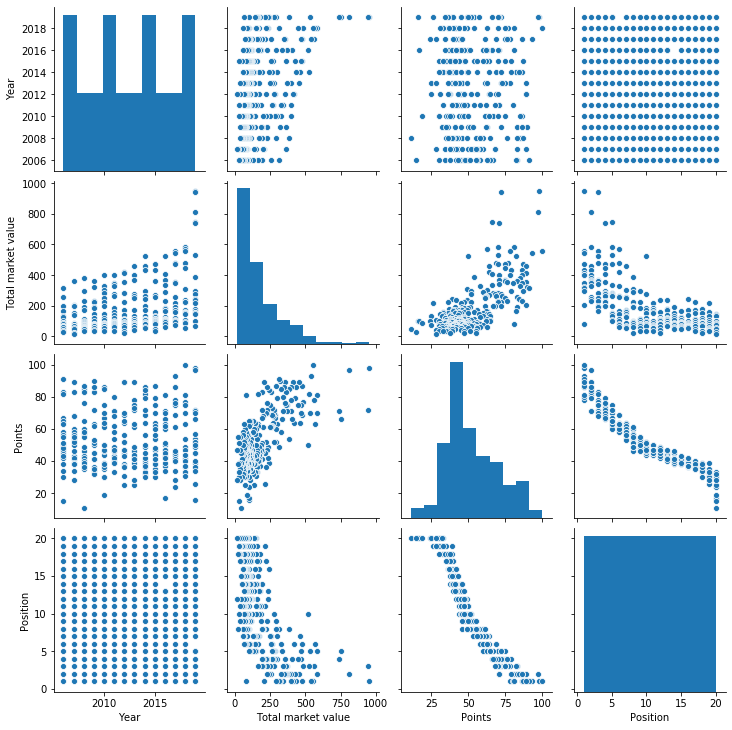

In [7]:
sns.pairplot(data[['Year','Total market value','Points','Position']])

In [8]:
abs(data['Total market value'].corr(data['Position'])) > data['Total market value'].corr(data['Points'])

False

In [26]:
#1 - Get our two columns into variables, then reshapre them

X = data['Total market value']
y = data['Points']

X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)

In [29]:
#2 - Use the train_test_split function to create our training sets & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [30]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
print(lm.coef_)

[[0.08527514]]


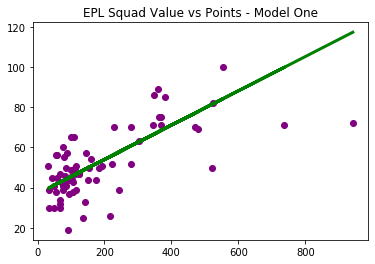

In [35]:
predictions = lm.predict(X_test)

plt.scatter(X_test, y_test, color='purple')
plt.plot(X_test, predictions, color='green', linewidth=3)
plt.title("EPL Squad Value vs Points - Model One")

plt.show()

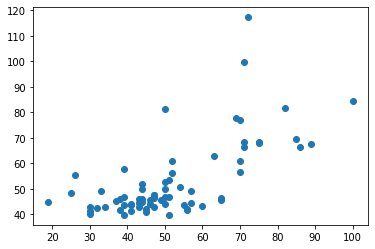

In [36]:
plt.scatter(y_test,predictions)

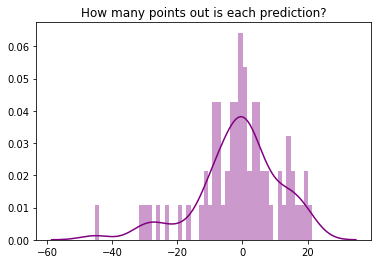

In [37]:
plt.title('How many points out is each prediction?')
sns.distplot((y_test-predictions), bins=50, color = 'purple')

In [39]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))

Mean Absolute Error: 9.184148244023456


In [40]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predictions.flatten()})
df.head()

,Actual,Predicted
0,57,49.277468
1,57,44.371590
2,65,45.553503
3,41,41.252225
4,47,47.571966


In [41]:
df['Actual'].corr(df['Predicted'])

0.6721835235859726

In [42]:
#Blank list
relativeValue = []

#Loop through each row
for index, team in data.iterrows():
    
    #Obtain which season we are looking at
    season = team['Year']
    
    #Create a new dataframe with just this season
    teamseason = data[data['Year'] == season]
    
    #Find the max value
    maxvaluee = teamseason['Total market value'].max()
    
    #Divide this row's value by the max value for the season
    tempRelativeValue = team['Total market value']/maxvalue
    
    #Append it to our list
    relativeValue.append(tempRelativeValue)
    
#Add list to new column in main dataframe
data["Relative Value"] = relativeValue

data.head()

,Year,Club,Position,Points,Squad,average age,Foreigners,Total market value,average market value,Relative Value
0,2019,Manchester City,1,98,46,23.3,33,948.83,20.63,2.610333
1,2019,Chelsea FC,3,72,54,24.6,40,941.63,17.44,2.590525
2,2019,Liverpool FC,2,97,39,23.8,25,810.09,20.77,2.228645
3,2019,Manchester United,5,66,36,24.4,22,749.70,20.83,2.062505
4,2019,Tottenham Hotspur,4,71,34,24.5,20,737.64,21.70,2.029327


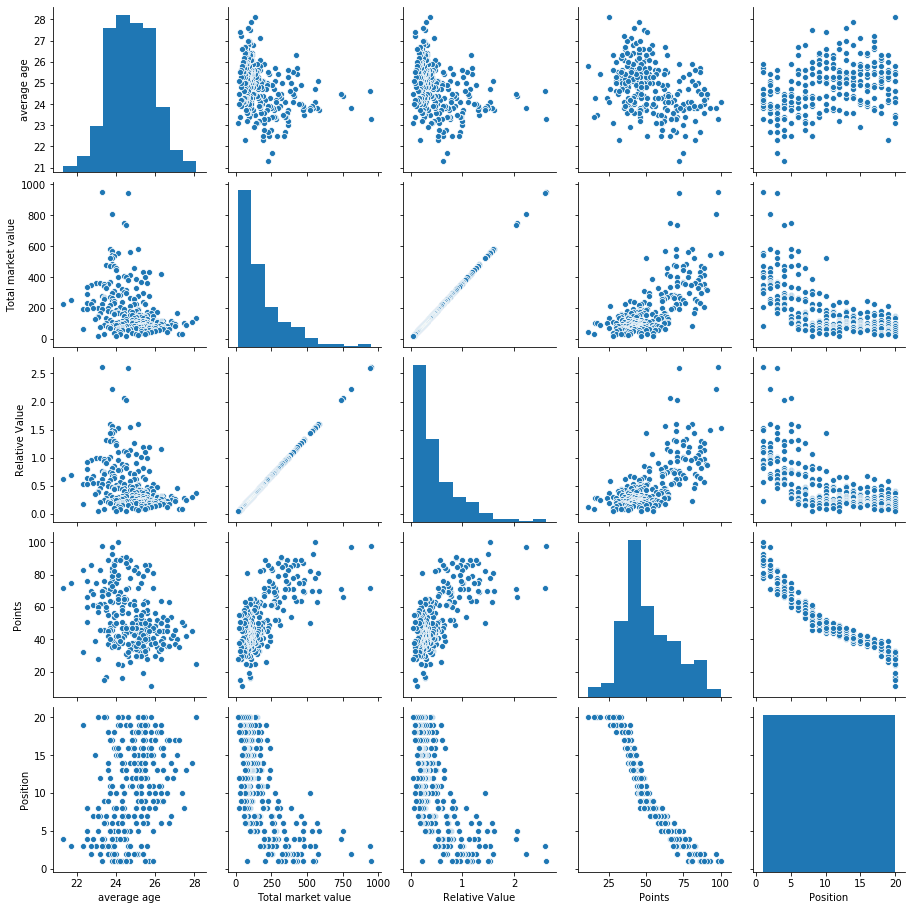

In [45]:
sns.pairplot(data[['average age', 'Total market value', 'Relative Value', 'Points', 'Position' ]])

In [53]:
#Assign relevant columns to variables and reshape them
X = data['Relative Value']
y = data['Points']
X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)

#Create training and test sets for each of the two variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

#Create an empty model, then train it against the variables
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
print(lm.coef_/10)

[[3.09966602]]


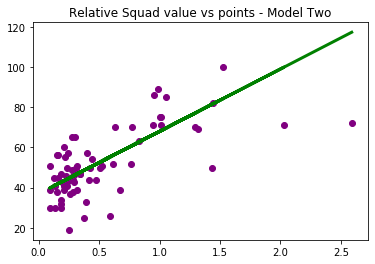

In [60]:
predictions = lm.predict(X_test)

plt.scatter(X_test, y_test,  color='purple')
plt.plot(X_test, predictions, color='green', linewidth=3)
plt.title("Relative Squad value vs points - Model Two")
plt.show()

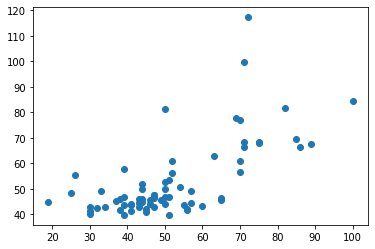

In [61]:
plt.scatter(y_test,predictions)

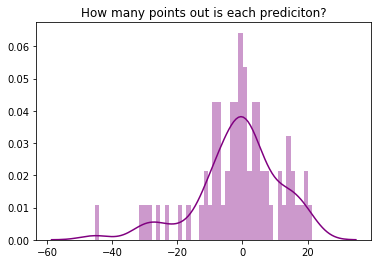

In [62]:
plt.title('How many points out is each prediciton?')
sns.distplot((y_test-predictions), bins=50, color='purple');

In [63]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

MAE: 9.184148244023458
